# Spark Day 1
![](https://pic2.zhimg.com/v2-90d0508bebd533f277bdaa874bf1c15b_1440w.jpg)

In [1]:
import os
import sys
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
import time
spark_name = os.environ.get('SPARK_HOME',None)
if not spark_name:
    raise ValueErrorError('spark环境没有配置好')
sys.path.insert(0,os.path.join(spark_name,'python'))
sys.path.insert(0,os.path.join(spark_name,'python/lib/py4j-0.10.4-src.zip'))
exec(open(os.path.join(spark_name,'python/pyspark/shell.py')).read())


Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.0
      /_/

Using Python version 3.8.3 (default, Jun  1 2020 17:43:00)
SparkSession available as 'spark'.


## Read the output.json

In [2]:
start_time = time.time()
wineDF = spark.read.json(r"./data/output.json")
print(f"威士忌Schema:")
wineDF.printSchema()
print(f"資料總比數: {wineDF.count()}")
print("使用時間: %s seconds " % (time.time() - start_time))

威士忌Schema:
root
 |-- comment: string (nullable = true)
 |-- name: string (nullable = true)
 |-- star: string (nullable = true)
 |-- user_name: string (nullable = true)

資料總比數: 401564
使用時間: 13.382969856262207 seconds 


In [3]:
wineDF.show()

+--------------------+--------------------+----+--------------------+
|             comment|                name|star|           user_name|
+--------------------+--------------------+----+--------------------+
|                null|william-larue-wel...| 5.0|        noahmjohnson|
|tremendous. silky...|william-larue-wel...| 5.0|New-Harvest-Coffe...|
|Neat - very hot i...|william-larue-wel...| 3.0|        BrokenBridge|
|An amazing Whiske...|william-larue-wel...| 5.0|         Darwincat67|
|                null|william-larue-wel...| 5.0|     Jason-Penberthy|
|                null|william-larue-wel...| 3.0|         mrfishyfish|
|                null|william-larue-wel...| 5.0|         Adalessa211|
|                null|william-larue-wel...| 5.0|     Craft-Beer-Geek|
|                null|william-larue-wel...| 5.0|     Sergio-R-Garcia|
|                null|william-larue-wel...| 4.0|           quickwing|
|                null|the-balvenie-tun-...| 5.0|              VinnyB|
|                nul

## 下SQL 語法查詢

In [4]:
start_time = time.time()
wineDF.createOrReplaceTempView("wine_name")
some_whiskey = spark.sql("SELECT * FROM wine_name WHERE name='four-roses-bourbon-single-barrel-2014'")
some_whiskey.count()
some_whiskey.show()
print("使用時間: %s seconds " % (time.time() - start_time))



+--------------------+--------------------+----+----------------+
|             comment|                name|star|       user_name|
+--------------------+--------------------+----+----------------+
|YUM! If you can f...|four-roses-bourbo...| 4.0|    WhiskeyWoman|
|Great bourbon, it...|four-roses-bourbo...| 4.0|     sabo_taylor|
|                null|four-roses-bourbo...| 4.0|   WhiskeyJagoff|
|                null|four-roses-bourbo...| 5.0|Stephanie_Moreno|
|                null|four-roses-bourbo...| 3.0|       skallen23|
|                null|four-roses-bourbo...| 4.0|          Dsotof|
|                null|four-roses-bourbo...| 4.0|          TarmoS|
|                null|four-roses-bourbo...| 4.0|     D-Schlueter|
|                null|four-roses-bourbo...| 4.0|      Drewolson7|
|                null|four-roses-bourbo...| 4.0|     MissWhiskey|
|                null|four-roses-bourbo...| 2.0|         philipc|
|     $60 from BevMo.|four-roses-bourbo...|null|     Joe-Mullins|
|         

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
dfPlot = some_whiskey.select("star").groupBy("star").count()

In [7]:
dfPlot.show()

+----+-----+
|star|count|
+----+-----+
| 1.0|    1|
| 4.5|    6|
|3.75|    1|
| 3.5|    1|
| 5.0|  181|
| 4.0|  232|
| 2.0|    9|
|4.25|    6|
| 3.0|   44|
|null|   13|
+----+-----+



In [8]:
x= dfPlot.toPandas()['star'].values.tolist()
y= dfPlot.toPandas()['count'].values.tolist()

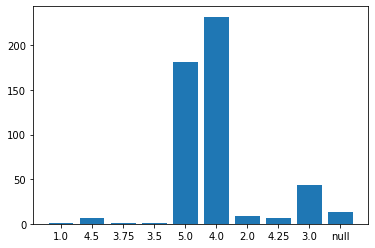

In [9]:
plt.bar(x,y)
plt.show()

In [10]:
from pyspark.sql.types import *
import time

In [11]:
schema = StructType([
    StructField("comment", StringType(), True),
    StructField("name", StringType(),True),
    StructField("star", IntegerType(),True),
    StructField("user_name", StringType(), True)
])

In [12]:
start_time = time.time()
df = spark.read.csv(r"./data/output.csv", header=True, schema=schema)
print("使用時間: %s seconds " % (time.time() - start_time))

使用時間: 0.03426861763000488 seconds 


In [13]:
df.show()

+--------------------+--------------------+----+------------------+
|             comment|                name|star|         user_name|
+--------------------+--------------------+----+------------------+
|                null|thomas-h-handy-sa...|null|    DanielMeichtry|
|                null|thomas-h-handy-sa...|null|        Coladaking|
|                null|thomas-h-handy-sa...|null|        Al-Jameson|
|                null|thomas-h-handy-sa...|null|           calowe2|
|                null|thomas-h-handy-sa...|null|   Stephen-Philips|
|                null|thomas-h-handy-sa...|null|   Craft-Beer-Geek|
|                null|thomas-h-handy-sa...|null|            jj9096|
|Believe the hype....|thomas-h-handy-sa...|null|        petermania|
|     $80 - Michigan.|thomas-h-handy-sa...|null|           gvsufan|
|Heard a lot about...|thomas-h-handy-sa...|null|           Joe-joe|
|                null|port-ellen-32-yea...|null|         cvireak10|
|True north at Eau...|port-ellen-32-yea...|null|

In [14]:
df.count()

471370